In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error
import os
import sys
import math
import seaborn as sns

parent_dir = os.path.dirname(os.path.realpath('../../analysis'))


# Add the parent directory to sys.path
sys.path.append(parent_dir)

# Import the module from the parent directory
import analysis.model_assessment
import analysis.train_data_analysis
from analysis.model_assessment import *
from analysis.plot_range_scatter import *
from scipy.stats import linregress

In [14]:
fnames_dt = ['../../../model_results/train_set_1285/all_dt_6_285.npz', '../../../model_results/train_set_1285/all_dt_6_40.npz', '../../../model_results/train_set_1285/all_dt_5_285.npz', \
         '../../../model_results/train_set_1285/all_dt_5_40.npz']

fnames_rf = ['../../../model_results/train_set_1285/all_rf_6_285.npz', '../../../model_results/train_set_1285/all_rf_6_40.npz', '../../../model_results/train_set_1285/all_rf_5_285.npz', \
         '../../../model_results/train_set_1285/all_rf_5_40.npz']

fnames_mlpreg = ['../../../model_results/train_set_1285/all_mlpreg_6_285.npz', '../../../model_results/train_set_1285/all_mlpreg_6_40.npz', '../../../model_results/train_set_1285/all_mlpreg_5_285.npz', \
         '../../../model_results/train_set_1285/all_mlpreg_5_40.npz']

Mean Squared Error:  0.10572475956879883
R-Squared of Fit:  0.3019887831029945
Mean Squared Error:  0.11474806002590612
R-Squared of Fit:  0.36327563445129635
Mean Squared Error:  0.08465916443794466
R-Squared of Fit:  0.35003814644121006
Mean Squared Error:  0.09854744108132489
R-Squared of Fit:  0.3725741809538948


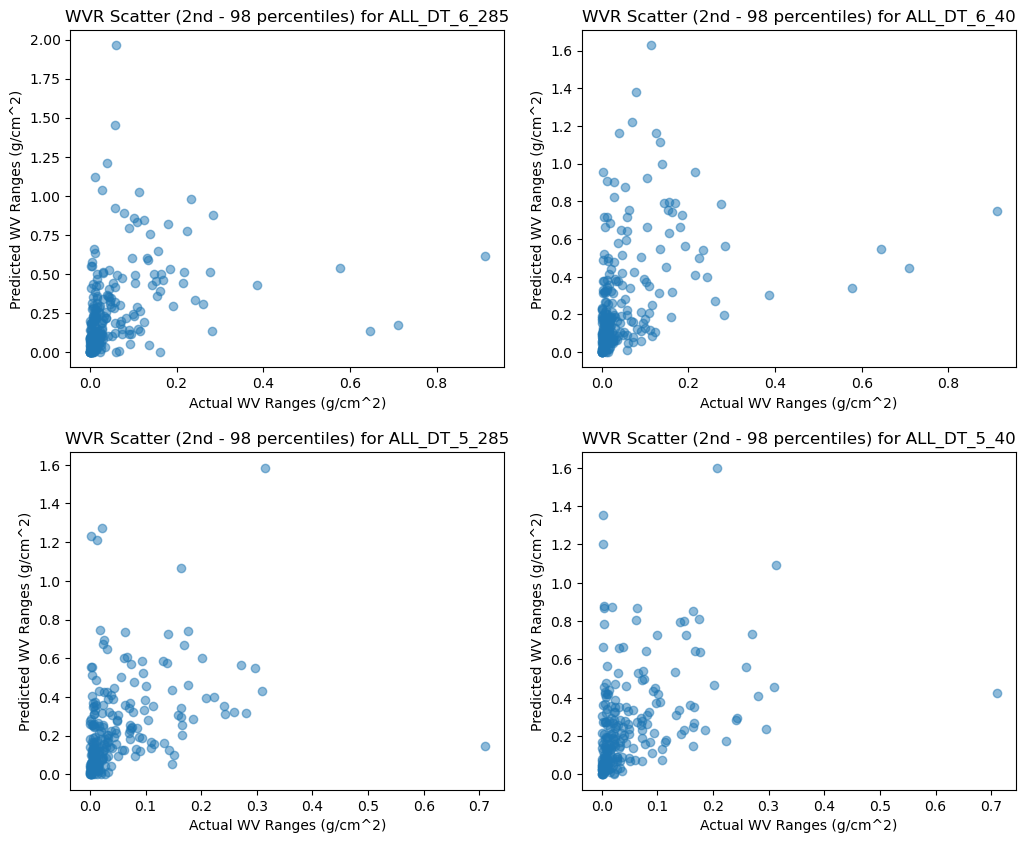

In [10]:
plot_scatter_permutations(fnames_dt, 'percentile')

Mean Squared Error:  0.025480613546728592
R-Squared of Fit:  0.5704066958002905
Mean Squared Error:  0.02890962962936
R-Squared of Fit:  0.5517905796178496
Mean Squared Error:  0.027958924988971012
R-Squared of Fit:  0.5585597644529811
Mean Squared Error:  0.032039229263621814
R-Squared of Fit:  0.5489152649272571


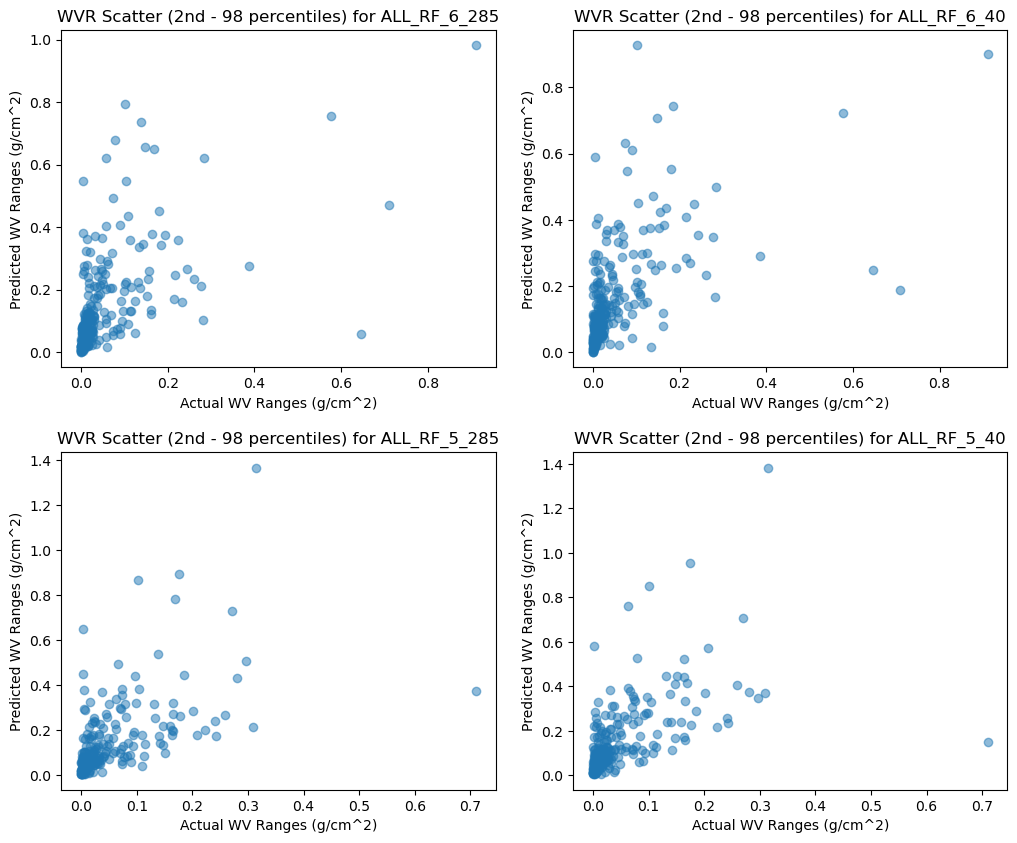

In [13]:
plot_scatter_permutations(fnames_rf, 'percentile')

Mean Squared Error:  0.039868115420017475
R-Squared of Fit:  0.5025252459807699
Mean Squared Error:  0.08589558039035072
R-Squared of Fit:  0.4055272502733672
Mean Squared Error:  0.028863443569192227
R-Squared of Fit:  0.5702188548195198
Mean Squared Error:  0.05019672151496209
R-Squared of Fit:  0.3754990071696128


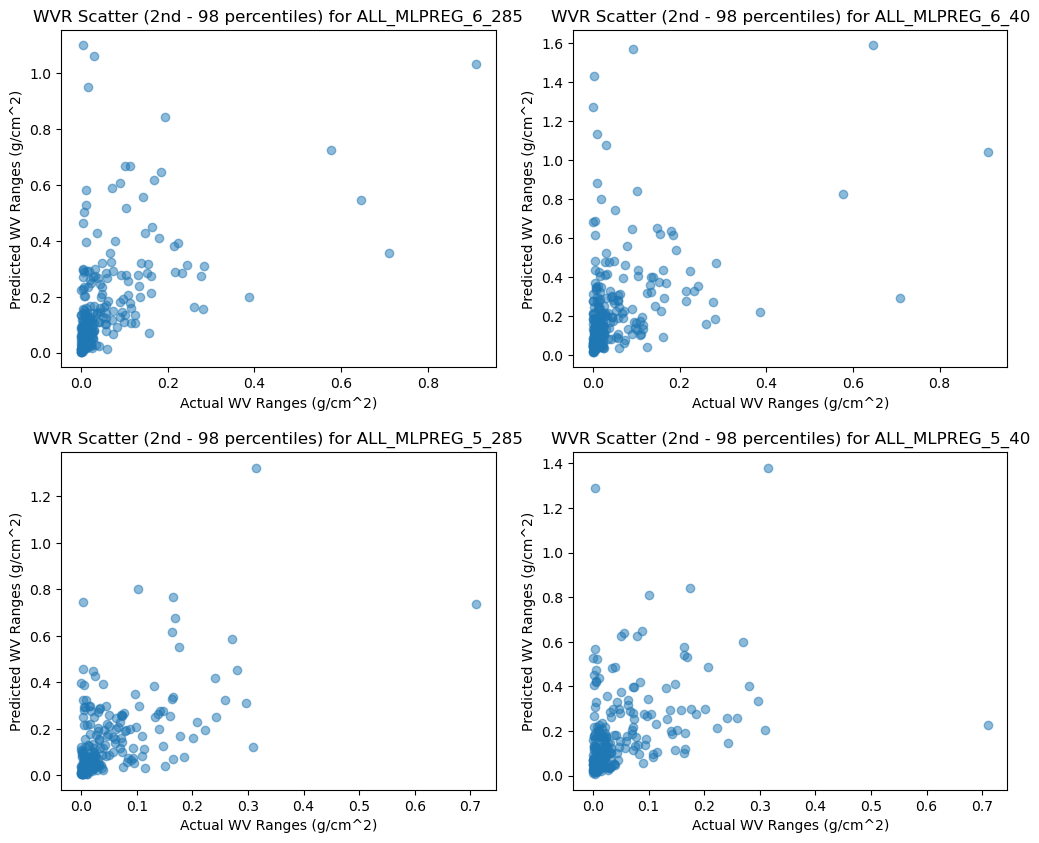

In [15]:
plot_scatter_permutations(fnames_mlpreg, 'percentile')

Mean Squared Error:  6.484365713471725
R-Squared of Fit:  0.5315431185318645
Mean Squared Error:  8.084131909050218
R-Squared of Fit:  0.46012094627026445
Mean Squared Error:  3.2375089902422185
R-Squared of Fit:  0.6552332470086127
Mean Squared Error:  4.72447705466814
R-Squared of Fit:  0.5389206574079607


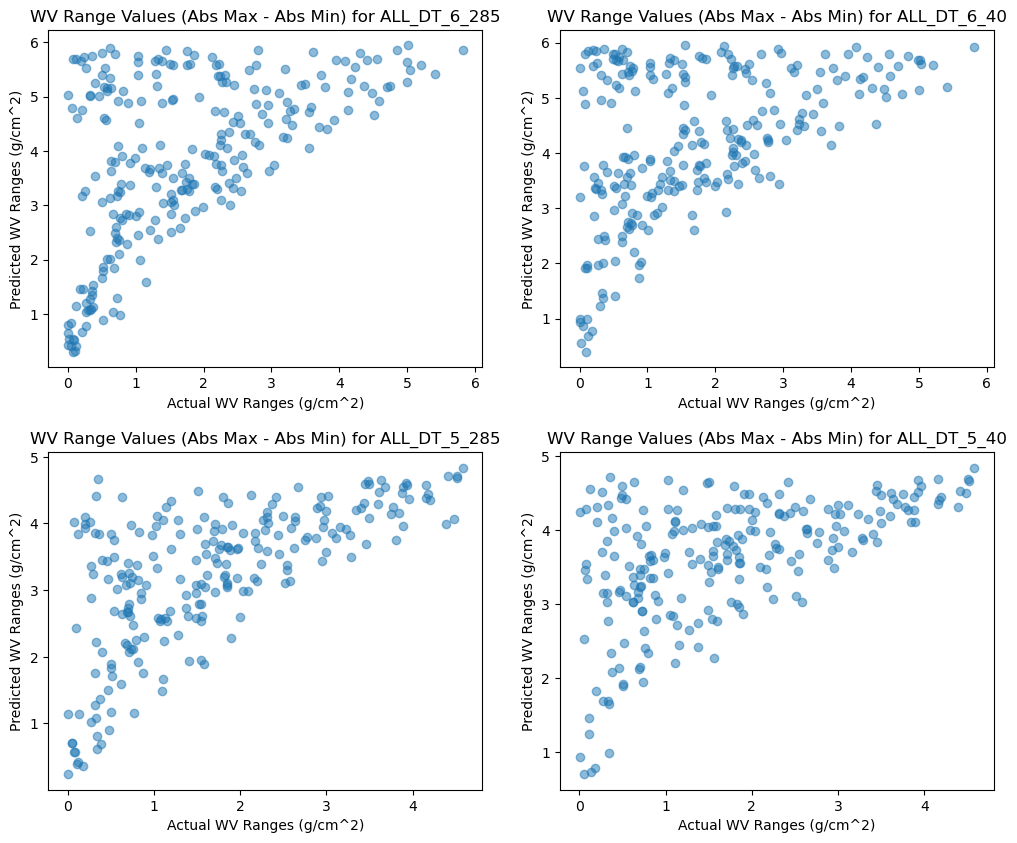

In [16]:
plot_scatter_permutations(fnames_dt, 'absolute')

Mean Squared Error:  0.586928040104811
R-Squared of Fit:  0.88818984752928
Mean Squared Error:  1.3365531280178538
R-Squared of Fit:  0.7560851523527952
Mean Squared Error:  0.42258037951750704
R-Squared of Fit:  0.8804414150427476
Mean Squared Error:  0.6485108893206758
R-Squared of Fit:  0.8360086467567425


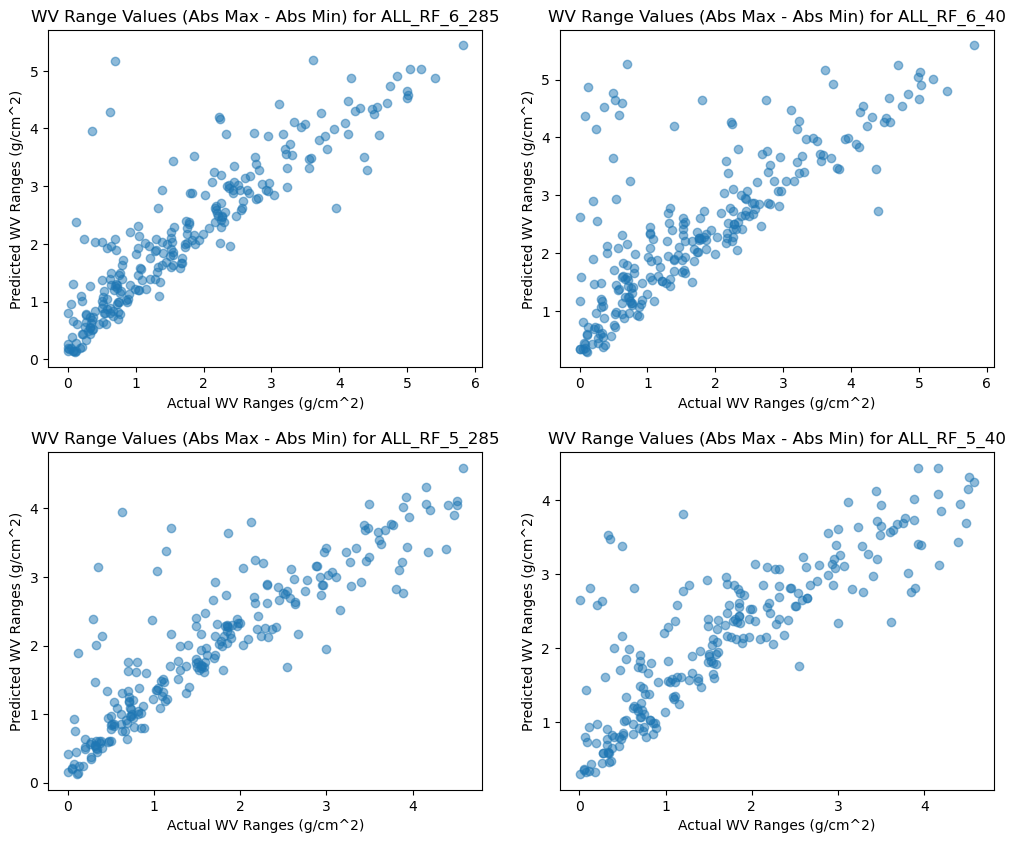

In [17]:
plot_scatter_permutations(fnames_rf, 'absolute')

Mean Squared Error:  0.6687048215573435
R-Squared of Fit:  0.8696377961525573
Mean Squared Error:  1.4305550623049181
R-Squared of Fit:  0.780785592548777
Mean Squared Error:  0.3031145933260719
R-Squared of Fit:  0.9114193664461152
Mean Squared Error:  0.5925992242152113
R-Squared of Fit:  0.8643571234545406


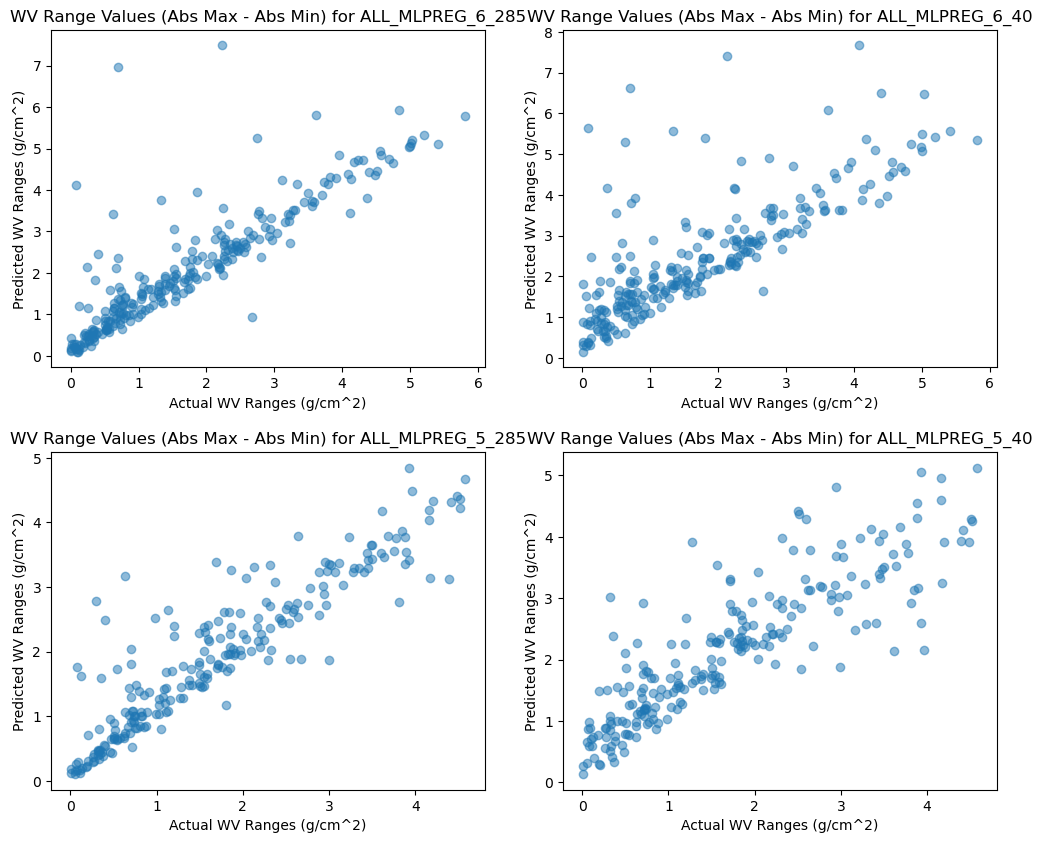

In [18]:
plot_scatter_permutations(fnames_mlpreg, 'absolute')